In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin

import tensorflow as tf
from tensorflow.python.ops import array_ops

from tfshow import show_graph
from emp_risk_optimizer import LinearRegressionGD

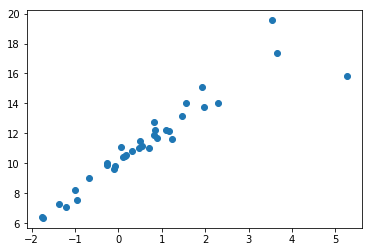

In [3]:
df = pd.read_csv('data/leverage.csv')
X = df.values[:, 0:2]
n, p = X.shape
y = df.values[:, -1].reshape(n, 1)
_ = plt.plot(X[:,1], y, 'o')

In [4]:
model = LinearRegressionGD(
    model_name='LinearRegression',
    eta=0.001)
model.fit(X,y,n_iter=10000)

Step 0: loss = 136.82785034 (0.018 sec)
Step 1000: loss = 3.75801969 (0.000 sec)
Step 2000: loss = 1.08668733 (0.001 sec)
Step 3000: loss = 0.96914351 (0.000 sec)
Step 4000: loss = 0.96397012 (0.001 sec)
Step 5000: loss = 0.96374249 (0.000 sec)
Step 6000: loss = 0.96373272 (0.000 sec)
Step 7000: loss = 0.96373212 (0.000 sec)
Step 8000: loss = 0.96373212 (0.000 sec)
Step 9000: loss = 0.96373212 (0.000 sec)


LinearRegression(eta=0.001)

In [13]:
evals = model.get_eval()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('model beta:', evals['params'])
print('beta:', beta)
print('model loss:', evals['loss'])
print('loss:', np.sum((y-X.dot(beta))**2)/n)
print('model Hessian:', evals['hessian'])
print('Hessian:', 2*X.T.dot(X)/n)

model beta: [[10.177584 ]
 [ 1.8256593]]
beta: [[10.17787328]
 [ 1.82557757]]
model loss: 0.9637321
loss: 0.9637321528238548
model Hessian: [[2.        1.2687083]
 [1.2687083 5.2220116]]
Hessian: [[2.         1.26870828]
 [1.26870828 5.22201118]]


In [15]:
x1 = np.array([1, -2])
x2 = np.array([1, 4.5])
y1 = model.predict(x1)
y2 = model.predict(x2)

ValueError: x and y can be no greater than 2-D, but have shapes (2,) and (2, 1, 1)

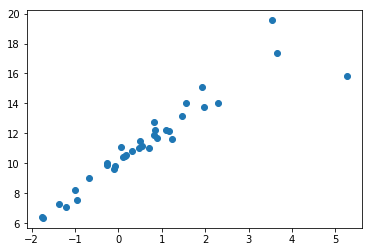

In [16]:
plt.plot(X[:,1], y, 'o')
_ = plt.plot([-2, 4.5], [y1, y2])